In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [5]:
data = pd.read_csv("../new_data/threshold_95percentile/ca_data_version_6.csv")

In [4]:
data.columns

Index(['Unnamed: 0', 'Latitude', 'Longitude', 'Solar_farm_present',
       'land_cover', 'slope', 'elevation', 'feature_violated', 'solrad_annual',
       'ac_monthly', 'poa_monthly', 'solrad_monthly', 'dc_monthly',
       'ac_annual', 'min_distance'],
      dtype='object')

Text(0.5, 0, 'Land Cover')

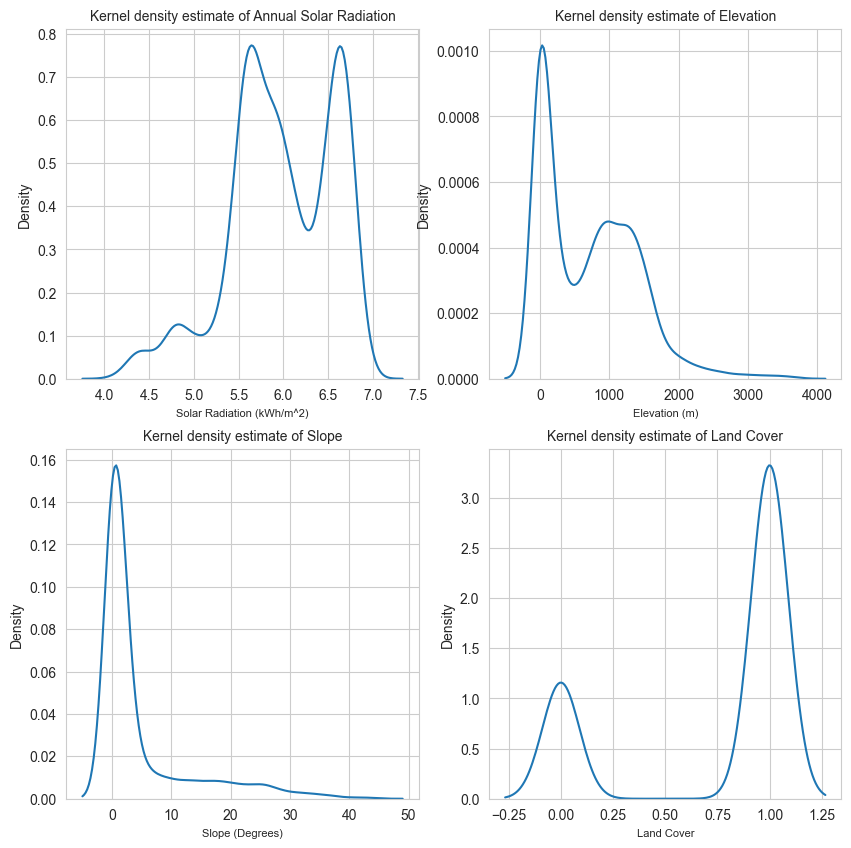

In [21]:
fig,ax = plt.subplots(2,2, figsize=(10,10))

sns.kdeplot(data['solrad_annual'], ax=ax[0][0])
ax[0][0].set_title('Kernel density estimate of Annual Solar Radiation', fontsize=10)
ax[0][0].set_xlabel('Solar Radiation (kWh/m^2)', fontsize=8)

sns.kdeplot(data['elevation'], ax=ax[0][1])
ax[0][1].set_title('Kernel density estimate of Elevation', fontsize=10)
ax[0][1].set_xlabel('Elevation (m)', fontsize=8)


sns.kdeplot(data['slope'], ax=ax[1][0])
ax[1][0].set_title('Kernel density estimate of Slope', fontsize=10)
ax[1][0].set_xlabel('Slope (Degrees)', fontsize=8)

sns.kdeplot(data['land_cover'], ax=ax[1][1])
ax[1][1].set_title('Kernel density estimate of Land Cover', fontsize=10)
ax[1][1].set_xlabel('Land Cover', fontsize=8)

Text(0.5, 1.0, 'Elevation vs Annual AC Output')

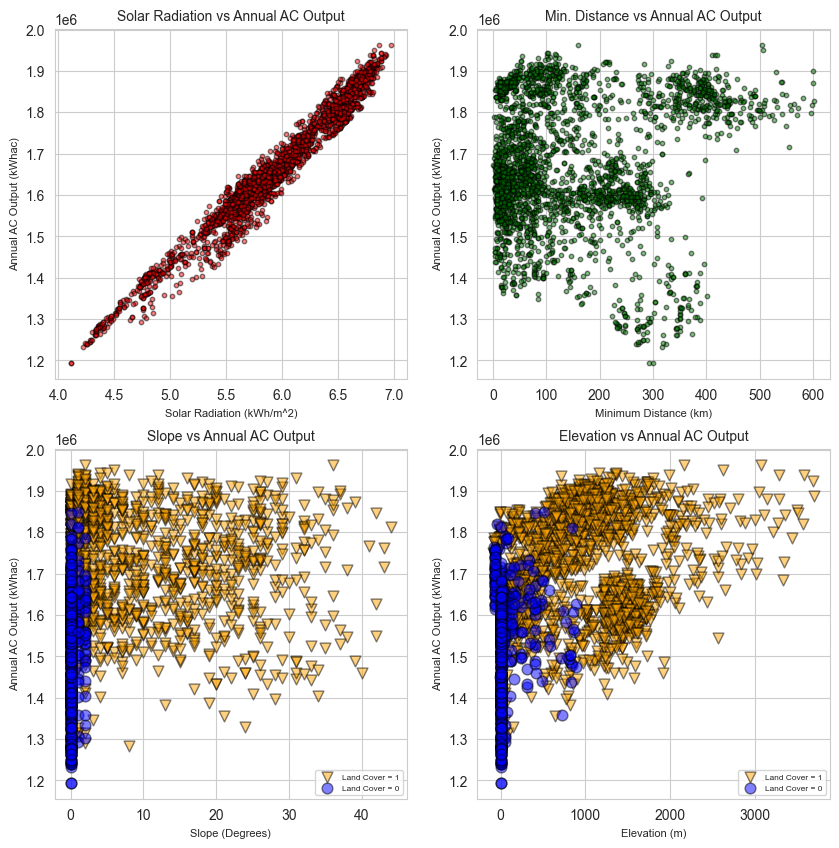

In [6]:
fig,ax = plt.subplots(2,2, figsize=(10,10))
y = data['ac_annual']

#SOLAR RADIATION
rad = data['solrad_annual']
ax[0][0].set_xlabel('Solar Radiation (kWh/m^2)', fontsize=8)
ax[0][0].set_ylabel('Annual AC Output (kWhac)', fontsize=8)
ax[0][0].set_title('Solar Radiation vs Annual AC Output', fontsize=10)
ax[0][0].scatter(rad,y, marker='o', s=10,alpha=.5,edgecolor='black',c='red')

#MINIMUM DISTANCE
dist = data['min_distance']
ax[0][1].set_xlabel('Minimum Distance (km)', fontsize=8)
ax[0][1].set_ylabel('Annual AC Output (kWhac)', fontsize=8)
ax[0][1].set_title('Min. Distance vs Annual AC Output', fontsize=10)
ax[0][1].scatter(dist,y, marker='o', s=10,alpha=.5,edgecolor='black',c='green')


#SLOPE
ax[1][0].scatter(data.loc[data.land_cover==1].slope,
               data.loc[data.land_cover==1].ac_annual,
               label="Land Cover = 1",
               marker='v',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='orange')
ax[1][0].scatter(data.loc[data.land_cover==0].slope,
               data.loc[data.land_cover==0].ac_annual,
               label="Land Cover = 0",
               marker='o',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='blue')

ax[1][0].set_xlabel("Slope (Degrees)", fontsize=8)
ax[1][0].set_ylabel("Annual AC Output (kWhac)", fontsize=8)
ax[1][0].legend(fontsize=6)
ax[1][0].set_title('Slope vs Annual AC Output', fontsize=10)


#ELEVATION
ax[1][1].scatter(data.loc[data.land_cover==1].elevation,
               data.loc[data.land_cover==1].ac_annual,
               label="Land Cover = 1",
               marker='v',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='orange')
ax[1][1].scatter(data.loc[data.land_cover==0].elevation,
               data.loc[data.land_cover==0].ac_annual,
               label="Land Cover = 0",
               marker='o',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='blue')

ax[1][1].set_xlabel("Elevation (m)", fontsize=8)
ax[1][1].set_ylabel("Annual AC Output (kWhac)", fontsize=8)
ax[1][1].legend(fontsize=6)
ax[1][1].set_title('Elevation vs Annual AC Output', fontsize=10)
